In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print('Libraries imported! :)')
import warnings
#%matplotlib notebook
warnings.filterwarnings('ignore')

Libraries imported! :)


In [2]:
data = pd.read_csv("Mall_Customers.csv")
data.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data=pd.read_csv("Mall_Customers.csv",index_col ="CustomerID")
data.head(5) 
#That's better 

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [4]:
print(data.shape)
print(data.isnull().sum())

(200, 4)
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


There're small datas missing in dataset.It seems nearly full.However never trust to this conclusion.It may be not null but It can be filled with another letter like "-","*" etc.

In [5]:
data.head(50)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
6,Female,22,17,76
7,Female,35,18,6
8,Female,23,18,94
9,Male,64,19,3


In [6]:
data.dtypes.value_counts()

int64     3
object    1
dtype: int64

In [7]:
data.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


## EDA

In [8]:
df = data.copy() # in case if we want to rollback

In [9]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

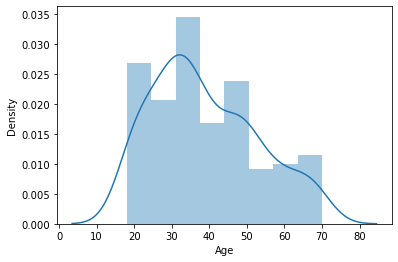

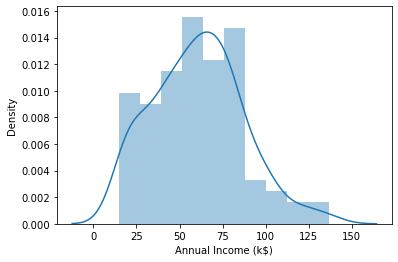

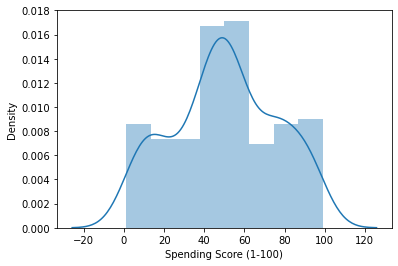

In [10]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(df[i])

<AxesSubplot:xlabel='Gender', ylabel='count'>

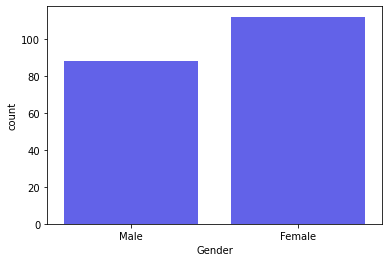

In [11]:
sns.countplot(data = df, x = 'Gender', color = 'b', alpha = 0.7)

In [12]:
df["Gender"].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [13]:
df["Gender"].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

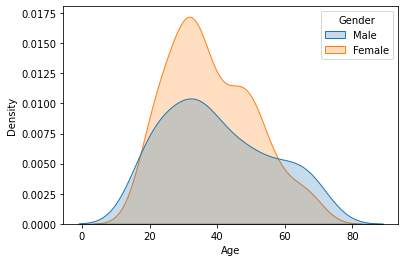

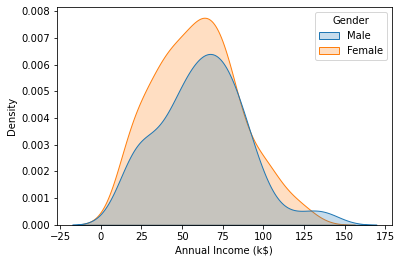

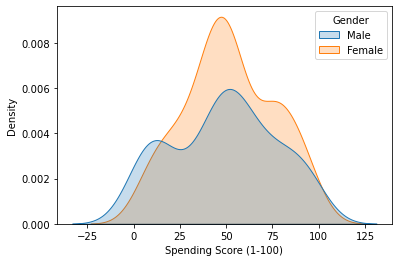

In [14]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.kdeplot(df[i],shade=True,hue=df['Gender'])

let's take a closer look for (Annual_Income & Gender) correlation

In [15]:
#df['Annual Income (k$)'].corr(df['Gender'])

This would give an error because Annual Income (k$) is number but Gender is string

In [16]:
#That's why we need to convert them.I will use astype('category') and .cat.codes
df2=df
df2['Gender']=df2['Gender'].astype('category').cat.codes
df2['Annual Income (k$)'].corr(df2['Gender'])

0.05640980987734997

let's visualize it 

<AxesSubplot:>

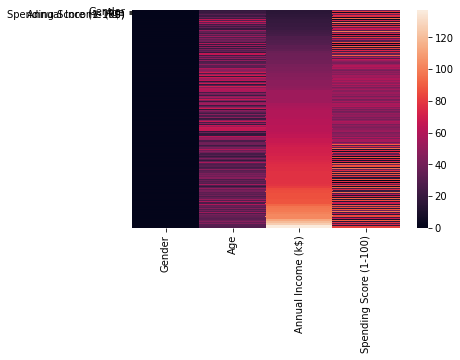

In [17]:
#And instead of doing 1 by 1 we may do all of them.Let's try heatmap
df2.reset_index(drop=True, inplace=True)
sns.heatmap(df2, 
        xticklabels=df2.columns,
        yticklabels=df2.columns)

it's not we wanted let's try with another style

In [18]:
df2.corr().style.background_gradient(cmap='coolwarm')

,Gender,Age,Annual Income (k$),Spending Score (1-100)
Gender,1.000000,0.060867,0.056410,-0.058109
Age,0.060867,1.000000,-0.012398,-0.327227
Annual Income (k$),0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),-0.058109,-0.327227,0.009903,1.000000


That's much better

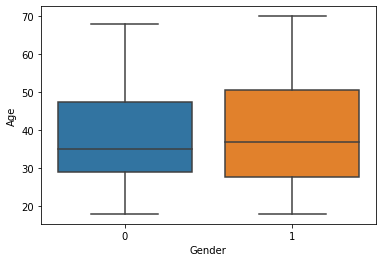

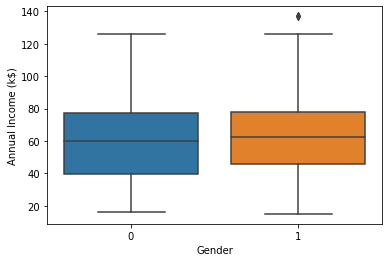

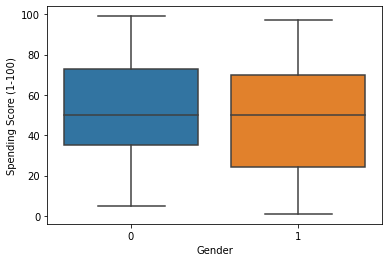

In [19]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data=df,x='Gender',y=df[i])

In [20]:
df.groupby(['Gender'])['Age', 'Annual Income (k$)',
       'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
0,38.098214,59.250000,51.526786
1,39.806818,62.227273,48.511364


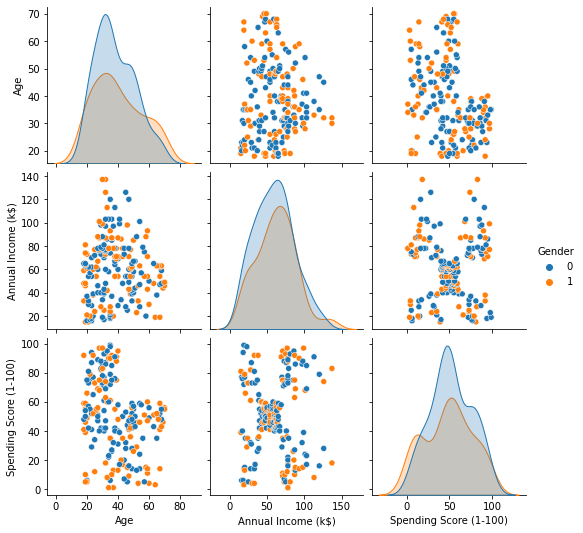

In [21]:
sns.pairplot(df,hue='Gender')

### Let's implement Clustering -> K-MeansClustering

In [22]:
from sklearn.cluster import KMeans

In [23]:
clustering1 = KMeans(n_clusters=3)
clustering1.fit(df[['Annual Income (k$)','Spending Score (1-100)']])

KMeans(n_clusters=3)

In [24]:
clustering1.inertia_

106348.37306211119

**Inertia** measures how well a dataset was clustered by K-Means

In [25]:
df['ncluster3'] =clustering1.labels_

In [26]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),ncluster3
0,1,19,15,39,2
1,1,21,15,81,2
2,0,20,16,6,2
3,0,23,16,77,2
4,0,31,17,40,2


In [27]:
intertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    intertia_scores.append(kmeans.inertia_)

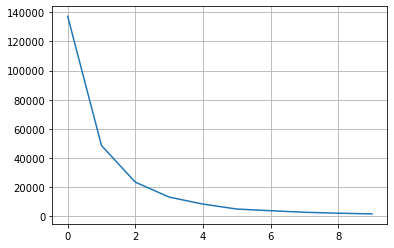

In [28]:
plt.grid()
plt.plot(intertia_scores)

In [29]:
df['ncluster3'].value_counts()

2    123
0     39
1     38
Name: ncluster3, dtype: int64

In [30]:
centers =pd.DataFrame(clustering1.cluster_centers_)
centers.columns = ['x_ax','y_ax']

In [31]:
centers

,x_ax,y_ax
0,86.538462,82.128205
1,87.000000,18.631579
2,44.154472,49.829268


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

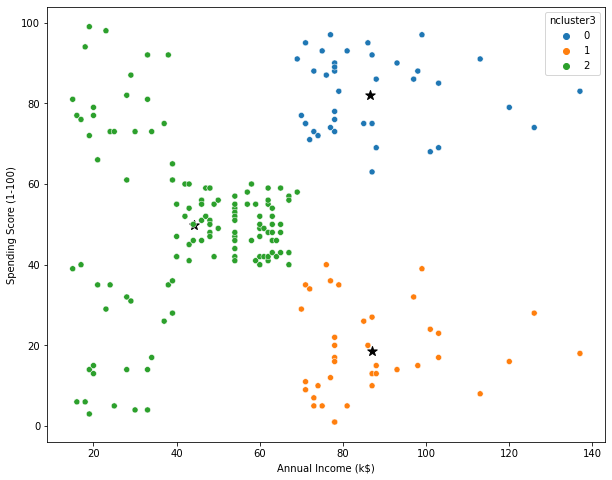

In [32]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x_ax'],y=centers['y_ax'],s=100,c='black',marker='*')
sns.scatterplot(data=df, x ='Annual Income (k$)',y='Spending Score (1-100)',hue='ncluster3',palette='tab10')
#plt.savefig('x.png') you may save if you want

Let's make it for n_cluster=5

In [33]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df['ncluster5'] =clustering2.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),ncluster3,ncluster5
0,1,19,15,39,2,2
1,1,21,15,81,2,0
2,0,20,16,6,2,2
3,0,23,16,77,2,0
4,0,31,17,40,2,2


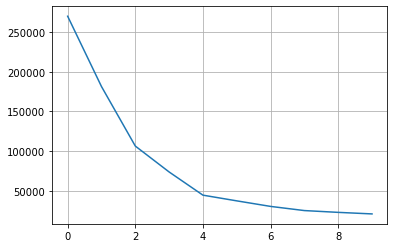

In [34]:
intertia_scores2=[]
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    intertia_scores2.append(kmeans2.inertia_)
plt.grid()
plt.plot(intertia_scores2)

In [35]:
centers2 =pd.DataFrame(clustering2.cluster_centers_)
centers2.columns = ['x_ax','y_ax']

In [36]:
centers2

,x_ax,y_ax
0,25.727273,79.363636
1,88.200000,17.114286
2,26.304348,20.913043
3,86.538462,82.128205
4,55.296296,49.518519


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

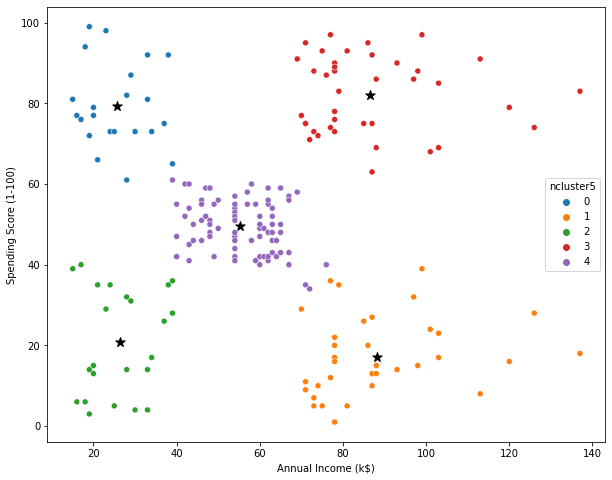

In [37]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers2['x_ax'],y=centers2['y_ax'],s=100,c='black',marker='*')
sns.scatterplot(data=df, x ='Annual Income (k$)',y='Spending Score (1-100)',hue='ncluster5',palette='tab10')
#plt.savefig('x.png') you may save if you want